In [106]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd


# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


# Estandarización variables numéricas y Codificación variables categóricas
# ------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler

# Gestión datos desbalanceados
# ------------------------------------------------------------------------------
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek

# Para separar los datos en train y test
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split

# Para codificar las variables
from sklearn.preprocessing import LabelEncoder 

#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

<font color= green>Usando el mismo dataset que usatéis ayer, los objetivos de los ejercicios de hoy son:
- Estandarizar las variables numéricas de vuestro set de datos
- Codificar las variables categóricas. Recordad que tendréis que tener en cuenta si vuestras variables tienen orden o no.
- Chequear si vuestros datos están balanceados. En caso de que no lo estén utilizad algunas de las herramientas aprendidas en la lección para balancearlos.
- Guardad el dataframe con los cambios que habéis aplicado para utilizarlo en la siguiente lección.

In [107]:
df = pd.read_pickle('Datos/Travel_Insurance_limpio.pkl')
df.head(2)

,Age,Employment_Type,Graduate_Or_Not,Annual_Income,Family_Members,Chronic_Diseases,Frequent_Flyer,Ever_Travelled_Abroad,Travel_Insurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0


In [108]:
df.dtypes

Age                         int64
Employment_Type          category
Graduate_Or_Not          category
Annual_Income               int64
Family_Members           category
Chronic_Diseases         category
Frequent_Flyer           category
Ever_Travelled_Abroad    category
Travel_Insurance            int64
dtype: object

In [109]:
df1 = df.copy()

### <font color=violet>Estandarización

Como ya sabemos que el método Standard Scaler es el más ampliamente usado, lo vamos a aplicar directamente. 

In [110]:
# iniciamos el método para escalar

scaler = StandardScaler()

In [111]:
# recordemos que la estandarización solo se hace para las variables predictoras numéricas

numericas = df1.select_dtypes(include = np.number)
numericas.head()

,Age,Annual_Income,Travel_Insurance
0,31,400000,0
1,31,1250000,0
2,34,500000,1
3,28,700000,0
4,28,700000,0


In [112]:
numericas.drop(["Travel_Insurance"], axis = 1, inplace = True)

In [113]:
# Ajustamos nuestros datos
scaler.fit(numericas)

# transformamos los datos

X_escaladas = scaler.transform(numericas)

# por último convertiremos el array que nos devuelve en un dataframe. 

numericas_estandar = pd.DataFrame(X_escaladas, columns = numericas.columns)
numericas_estandar.head(2)

,Age,Annual_Income
0,0.426113,-1.482446
1,0.426113,0.874835


In [114]:
# Dropeamos las columnas sin estandarizar del df original.

df1.drop(["Age", "Annual_Income"], axis = 1, inplace=True)
df1.head()

,Employment_Type,Graduate_Or_Not,Family_Members,Chronic_Diseases,Frequent_Flyer,Ever_Travelled_Abroad,Travel_Insurance
0,Government Sector,Yes,6,1,No,No,0
1,Private Sector/Self Employed,Yes,7,0,No,No,0
2,Private Sector/Self Employed,Yes,4,1,No,No,1
3,Private Sector/Self Employed,Yes,3,1,No,No,0
4,Private Sector/Self Employed,Yes,8,1,Yes,No,0


In [115]:
# Unimos las numéricas estándar al df original.

df1 = pd.concat([df1, numericas_estandar], axis = 1)

# chequeamos que esta todo bien
df1.head()

,Employment_Type,Graduate_Or_Not,Family_Members,Chronic_Diseases,Frequent_Flyer,Ever_Travelled_Abroad,Travel_Insurance,Age,Annual_Income
0,Government Sector,Yes,6,1,No,No,0.0,0.426113,-1.482446
1,Private Sector/Self Employed,Yes,7,0,No,No,0.0,0.426113,0.874835
2,Private Sector/Self Employed,Yes,4,1,No,No,1.0,1.453557,-1.205119
3,Private Sector/Self Employed,Yes,3,1,No,No,0.0,-0.601330,-0.650464
4,Private Sector/Self Employed,Yes,8,1,Yes,No,0.0,-0.601330,-0.650464


### <font color=violet>Codificación con datos estandarizados

In [116]:
df1.head(2)

,Employment_Type,Graduate_Or_Not,Family_Members,Chronic_Diseases,Frequent_Flyer,Ever_Travelled_Abroad,Travel_Insurance,Age,Annual_Income
0,Government Sector,Yes,6,1,No,No,0.0,0.426113,-1.482446
1,Private Sector/Self Employed,Yes,7,0,No,No,0.0,0.426113,0.874835


In [117]:
categoricas = df1.select_dtypes(include = 'category')
categoricas.head()

,Employment_Type,Graduate_Or_Not,Family_Members,Chronic_Diseases,Frequent_Flyer,Ever_Travelled_Abroad
0,Government Sector,Yes,6,1,No,No
1,Private Sector/Self Employed,Yes,7,0,No,No
2,Private Sector/Self Employed,Yes,4,1,No,No
3,Private Sector/Self Employed,Yes,3,1,No,No
4,Private Sector/Self Employed,Yes,8,1,Yes,No


Creemos que todas nuestras variables categóricas tienen orden, por lo tanto vamos a usar el método Label Encoding.

In [118]:
# iniciamos el método
le = LabelEncoder()

df1['Employment_Type_le']=le.fit_transform(df1['Employment_Type'])
df1['Graduate_Or_Not_le']=le.fit_transform(df1['Graduate_Or_Not'])
df1['Frequent_Flyer_le']=le.fit_transform(df1['Frequent_Flyer'])
df1['Ever_Travelled_Abroad_le']=le.fit_transform(df1['Ever_Travelled_Abroad'])
df1['Family_Members_le']=le.fit_transform(df1['Family_Members'])
df1['Chronic_Diseases_le']=le.fit_transform(df1['Chronic_Diseases'])

In [119]:
# chequeamos el dataframe de nuevo

df1.sample(10)

,Employment_Type,Graduate_Or_Not,Family_Members,Chronic_Diseases,Frequent_Flyer,Ever_Travelled_Abroad,Travel_Insurance,Age,Annual_Income,Employment_Type_le,Graduate_Or_Not_le,Frequent_Flyer_le,Ever_Travelled_Abroad_le,Family_Members_le,Chronic_Diseases_le
1038,Private Sector/Self Employed,No,4,0,No,No,1.0,1.453557,0.320181,1,0,0,0,2,0
59,Private Sector/Self Employed,Yes,9,0,Yes,Yes,1.0,1.111076,1.290826,1,1,1,1,7,0
1864,Government Sector,Yes,6,1,No,No,1.0,NaN,NaN,0,1,0,0,4,1
1128,Government Sector,Yes,4,0,No,No,0.0,-0.601330,-1.066455,0,1,0,0,2,0
901,Government Sector,Yes,2,0,No,No,0.0,0.083632,-1.066455,0,1,0,0,0,0
872,Private Sector/Self Employed,No,3,0,No,No,0.0,1.453557,1.568153,1,0,0,0,1,0
573,Private Sector/Self Employed,No,3,0,No,No,0.0,-0.943811,-0.373137,1,0,0,0,1,0
869,Private Sector/Self Employed,Yes,3,0,No,Yes,1.0,1.111076,-0.650464,1,1,0,1,1,0
21,Private Sector/Self Employed,Yes,3,0,No,No,1.0,-0.258849,-1.621110,1,1,0,0,1,0
1653,Private Sector/Self Employed,Yes,5,1,No,No,1.0,NaN,NaN,1,1,0,0,3,1


Dataset con las variables categóricas codificadas y las numéricas estandarizadas.

In [120]:
# por último nos queda eliminar las columnas categóricas originales porque ya no nos hacen falta. 

df1.drop(['Employment_Type', 'Graduate_Or_Not', 'Frequent_Flyer','Ever_Travelled_Abroad', 'Family_Members', 'Chronic_Diseases'], axis = 1, inplace=True)
df1.head(2)

,Travel_Insurance,Age,Annual_Income,Employment_Type_le,Graduate_Or_Not_le,Frequent_Flyer_le,Ever_Travelled_Abroad_le,Family_Members_le,Chronic_Diseases_le
0,0.0,0.426113,-1.482446,0,1,0,0,4,1
1,0.0,0.426113,0.874835,1,1,0,0,5,0


### <font color=violet>Codificación con datos sin estandarizar

In [121]:
df2 = df.copy()
df2.head(2)

,Age,Employment_Type,Graduate_Or_Not,Annual_Income,Family_Members,Chronic_Diseases,Frequent_Flyer,Ever_Travelled_Abroad,Travel_Insurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0


Creemos que todas nuestras variables categóricas tienen orden, por lo tanto vamos a usar el método Label Encoding.

In [122]:
# iniciamos el método
le = LabelEncoder()

df2['Employment_Type_le']=le.fit_transform(df2['Employment_Type'])
df2['Graduate_Or_Not_le']=le.fit_transform(df2['Graduate_Or_Not'])
df2['Frequent_Flyer_le']=le.fit_transform(df2['Frequent_Flyer'])
df2['Ever_Travelled_Abroad_le']=le.fit_transform(df2['Ever_Travelled_Abroad'])
df2['Family_Members_le']=le.fit_transform(df2['Family_Members'])
df2['Chronic_Diseases_le']=le.fit_transform(df2['Chronic_Diseases'])


In [123]:
# chequeamos el dataframe de nuevo

df2.sample(10)

,Age,Employment_Type,Graduate_Or_Not,Annual_Income,Family_Members,Chronic_Diseases,Frequent_Flyer,Ever_Travelled_Abroad,Travel_Insurance,Employment_Type_le,Graduate_Or_Not_le,Frequent_Flyer_le,Ever_Travelled_Abroad_le,Family_Members_le,Chronic_Diseases_le
1251,28,Private Sector/Self Employed,Yes,500000,5,1,No,No,1,1,1,0,0,3,1
1600,28,Government Sector,Yes,300000,7,0,No,No,1,0,1,0,0,5,0
356,34,Private Sector/Self Employed,Yes,1000000,4,0,No,No,0,1,1,0,0,2,0
918,33,Government Sector,Yes,1000000,7,1,No,No,1,0,1,0,0,5,1
1156,28,Private Sector/Self Employed,Yes,1300000,6,0,No,No,1,1,1,0,0,4,0
65,26,Private Sector/Self Employed,Yes,600000,5,1,No,No,0,1,1,0,0,3,1
1367,27,Government Sector,Yes,850000,5,0,No,No,1,0,1,0,0,3,0
250,34,Private Sector/Self Employed,Yes,1000000,6,1,No,No,1,1,1,0,0,4,1
781,27,Government Sector,Yes,500000,5,0,No,No,1,0,1,0,0,3,0
1242,28,Private Sector/Self Employed,Yes,700000,3,1,No,Yes,0,1,1,0,1,1,1


Dataset con las variables categóricas codificadas y las numéricas sin estandarizar.

In [124]:
# por último nos queda eliminar las columnas categóricas originales porque ya no nos hacen falta. 

df2.drop(['Employment_Type', 'Graduate_Or_Not', 'Frequent_Flyer','Ever_Travelled_Abroad', 'Family_Members', 'Chronic_Diseases'], axis = 1, inplace=True)
df2.head(2)

,Age,Annual_Income,Travel_Insurance,Employment_Type_le,Graduate_Or_Not_le,Frequent_Flyer_le,Ever_Travelled_Abroad_le,Family_Members_le,Chronic_Diseases_le
0,31,400000,0,0,1,0,0,4,1
1,31,1250000,0,1,1,0,0,5,0


### <font color=violet>Desbalanceo

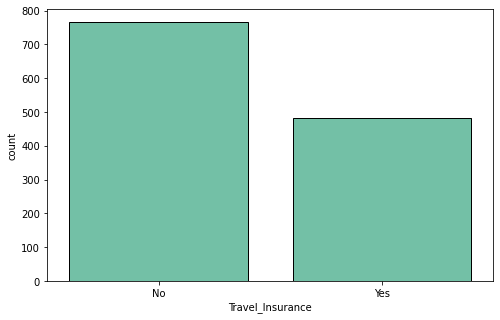

In [125]:
# recordemos como estaban distribuidos nuestros datos

plt.figure(figsize=(8,5)) # para cambiar el tamaño de la figura

fig1 = sns.countplot(data = df, x = "Travel_Insurance",  color = "mediumaquamarine",  edgecolor='black')
fig1.set(xticklabels=["No", "Yes"]) 
plt.show()

### **Downsampling**

Ajustaremos la cantidad de datos de la categoría mayoritaria a la minoritaria. 

In [126]:
df1.head()

,Travel_Insurance,Age,Annual_Income,Employment_Type_le,Graduate_Or_Not_le,Frequent_Flyer_le,Ever_Travelled_Abroad_le,Family_Members_le,Chronic_Diseases_le
0,0.0,0.426113,-1.482446,0,1,0,0,4,1
1,0.0,0.426113,0.874835,1,1,0,0,5,0
2,1.0,1.453557,-1.205119,1,1,0,0,2,1
3,0.0,-0.601330,-0.650464,1,1,0,0,1,1
4,0.0,-0.601330,-0.650464,1,1,1,0,6,1


In [127]:
df1.dtypes

Travel_Insurance            float64
Age                         float64
Annual_Income               float64
Employment_Type_le            int64
Graduate_Or_Not_le            int64
Frequent_Flyer_le             int64
Ever_Travelled_Abroad_le      int64
Family_Members_le             int64
Chronic_Diseases_le           int64
dtype: object

In [128]:
# lo primero que hacemos es sacar el número de registros que tenemos para la clase minoritaria
num_minoritarios = df1["Travel_Insurance"].value_counts()[1]
num_minoritarios

483

In [129]:
# nos creamos un dataframe solo con las filas donde la variable respuesta sea Yes. 
minoritarios = df1[df1["Travel_Insurance"] == 1]
minoritarios.head(2)

,Travel_Insurance,Age,Annual_Income,Employment_Type_le,Graduate_Or_Not_le,Frequent_Flyer_le,Ever_Travelled_Abroad_le,Family_Members_le,Chronic_Diseases_le
2,1.0,1.453557,-1.205119,1,1,0,0,2,1
7,1.0,0.426113,1.152163,1,1,1,1,1,0


In [130]:
# extraemos una muestra de la categoría mayoritaria que sea del mismo tamaño que la clase minotaria

mayoritarios = df1[df1["Travel_Insurance"] == 0].sample(num_minoritarios, random_state = 42)
mayoritarios.head(2)

,Travel_Insurance,Age,Annual_Income,Employment_Type_le,Graduate_Or_Not_le,Frequent_Flyer_le,Ever_Travelled_Abroad_le,Family_Members_le,Chronic_Diseases_le
860,0.0,-0.258849,0.736172,1,1,0,0,2,1
1647,0.0,NaN,NaN,1,1,1,0,3,1


In [131]:
# Ahora es el momento de unir los *dataframes*
balanceado = pd.concat([minoritarios,mayoritarios],axis = 0)
balanceado.head(2)

,Travel_Insurance,Age,Annual_Income,Employment_Type_le,Graduate_Or_Not_le,Frequent_Flyer_le,Ever_Travelled_Abroad_le,Family_Members_le,Chronic_Diseases_le
2,1.0,1.453557,-1.205119,1,1,0,0,2,1
7,1.0,0.426113,1.152163,1,1,1,1,1,0


In [132]:
# chequeamos como es nuestro dataframe ahora
balanceado["Travel_Insurance"].value_counts()

1.0    483
0.0    483
Name: Travel_Insurance, dtype: int64

### **Upsampling**
Ajustaremos la cantidad de datos de la categoría minoritaria a la mayoritaria. 

In [133]:
num_mayoritarios = df1["Travel_Insurance"].value_counts()[0]
num_mayoritarios

766

In [134]:
# seleccionamos ls datos de la clase mayoritaria

mayoritarios2 = df1[df1["Travel_Insurance"] == 0]
mayoritarios2.head(2)

,Travel_Insurance,Age,Annual_Income,Employment_Type_le,Graduate_Or_Not_le,Frequent_Flyer_le,Ever_Travelled_Abroad_le,Family_Members_le,Chronic_Diseases_le
0,0.0,0.426113,-1.482446,0,1,0,0,4,1
1,0.0,0.426113,0.874835,1,1,0,0,5,0


In [135]:
# hacemos un selección aleatoria de datos de la clase minoritaria, para tener el mismo número que la clase mayoritaria

minoritarios2 = df1[df1["Travel_Insurance"] ==1].sample(num_mayoritarios, replace=True)
minoritarios2.head(2)

,Travel_Insurance,Age,Annual_Income,Employment_Type_le,Graduate_Or_Not_le,Frequent_Flyer_le,Ever_Travelled_Abroad_le,Family_Members_le,Chronic_Diseases_le
1562,1.0,NaN,NaN,1,1,0,0,2,0
386,1.0,1.453557,0.181517,1,1,0,1,3,0


In [136]:
# unimos los dos dataframes

balanceado2 = pd.concat([mayoritarios2,minoritarios2], axis = 0)
balanceado2.head(2)

,Travel_Insurance,Age,Annual_Income,Employment_Type_le,Graduate_Or_Not_le,Frequent_Flyer_le,Ever_Travelled_Abroad_le,Family_Members_le,Chronic_Diseases_le
0,0.0,0.426113,-1.482446,0,1,0,0,4,1
1,0.0,0.426113,0.874835,1,1,0,0,5,0


In [137]:
# chequeamos como quedaron cada una de nuestras categorías

balanceado2["Travel_Insurance"].value_counts()

0.0    766
1.0    766
Name: Travel_Insurance, dtype: int64

In [141]:
# Eliminamos los nulos

In [142]:
df1.isnull().sum()

Travel_Insurance            358
Age                         358
Annual_Income               358
Employment_Type_le            0
Graduate_Or_Not_le            0
Frequent_Flyer_le             0
Ever_Travelled_Abroad_le      0
Family_Members_le             0
Chronic_Diseases_le           0
dtype: int64

In [143]:
df1 = df1.dropna()

In [144]:
df1.isnull().sum()

Travel_Insurance            0
Age                         0
Annual_Income               0
Employment_Type_le          0
Graduate_Or_Not_le          0
Frequent_Flyer_le           0
Ever_Travelled_Abroad_le    0
Family_Members_le           0
Chronic_Diseases_le         0
dtype: int64

Guardamos los archivos para las próximas lecciones.

In [145]:
df1.to_pickle("Datos/Travel_Insurance_esta_enco.pkl")
df2.to_pickle("Datos/Travel_Insurance_enco.pkl")
balanceado.to_pickle("Datos/Travel_Insurancec_esta_enco_down.pkl")
balanceado2.to_pickle("Datos/Travel_Insurance_esta_enco_up.pkl")